# User Analytics in the Telecommunication Industry

## Task2 : User Engagement Analysis

### Importing necessary Libraries

In [1]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
import os, sys
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv("D:\\Digicrome classes\\NextHIkes\Project 5\\cleaned_data")
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.959783,17.633655,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.959783,17.633655,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.959783,17.633655,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.tail()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
146886,149995,13042425979329300480,2019-04-29 07:28:41,615.0,2019-04-30 00:01:49,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,313.0,9.0,63420.0,1393.0,54.0,23.0,9.0,12.0,96.0,3.0,0.0,0.0,3380381.0,2355730.0,59587792.0,undefined,undefined,4801.0,8448.0,962097.0,31078.0,1139573.0,126061.0,3459965.0,820142.0,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
146887,149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,42376.0,41915.0,81230763.0,Apple,Apple iPhone 8 Plus (A1897),223.0,229.0,3464974.0,52091.0,9967603.0,2817311.0,57639.0,633237.0,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
146888,149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),105.0,102.0,2344568.0,7613.0,2229420.0,2185941.0,1954414.0,167304.0,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
146889,149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),104.0,108.0,1245845.0,14394.0,3850890.0,2734579.0,1525734.0,532543.0,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0
146890,149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,43.0,82.0,801547.0,21562.0,4189773.0,3567494.0,2228270.0,622644.0,8817106.0,8305402.0,3322253.0,13172589.0,352536971.0,2529475.0,814713113.0,1406930.0,29626096.0,371895920.0


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [9]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 146891 rows and 45 columns


In [10]:
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [11]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       146891 non-null  uint64 
 1   Start                           146891 non-null  object 
 2   Start ms                        146891 non-null  float64
 3   End                             146891 non-null  object 
 4   End ms                          146891 non-null  float64
 5   Dur. (ms)                       146891 non-null  float64
 6   IMSI                            146891 non-null  float64
 7   MSISDN/Number                   146891 non-null  float64
 8   IMEI                            146891 non-null  float64
 9   Last Location Name              146891 non-null  object 
 10  Avg RTT DL (ms)                 146891 non-null  float64
 11  Avg RTT UL (ms)                 146891 non-null  float64
 12  Avg Bearer TP DL

In [12]:
#converting 'Bearer ID' to float
df= df.astype({'Bearer Id': float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       146891 non-null  float64
 1   Start                           146891 non-null  object 
 2   Start ms                        146891 non-null  float64
 3   End                             146891 non-null  object 
 4   End ms                          146891 non-null  float64
 5   Dur. (ms)                       146891 non-null  float64
 6   IMSI                            146891 non-null  float64
 7   MSISDN/Number                   146891 non-null  float64
 8   IMEI                            146891 non-null  float64
 9   Last Location Name              146891 non-null  object 
 10  Avg RTT DL (ms)                 146891 non-null  float64
 11  Avg RTT UL (ms)                 146891 non-null  float64
 12  Avg Bearer TP DL

### Sessions frequency

In [13]:
#Group users
users_data = df.groupby('MSISDN/Number')

In [14]:
# Get sessions frequency (count the number of sessions)
users_sessions= users_data['Bearer Id'].count()
users_sessions.head(10)

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
3.360101e+10    2
3.360101e+10    2
3.360101e+10    1
3.360101e+10    2
3.360102e+10    1
Name: Bearer Id, dtype: int64

### Session duration

In [15]:
# How long each session was
users_sessions= users_data['Dur. (ms)'].sum()
users_sessions

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.378997e+10    160461.0
3.378998e+10    210389.0
3.379000e+10      8810.0
3.379000e+10    140988.0
3.370000e+14    253030.0
Name: Dur. (ms), Length: 105719, dtype: float64

In [16]:
# Aggregation of Total values
df["Total Uploads"]=df["Google UL (Bytes)"]+df["Email UL (Bytes)"]+df["Social Media UL (Bytes)"]+df["Youtube UL (Bytes)"]+df["Netflix UL (Bytes)"]+df["Gaming UL (Bytes)"]+df["Other UL (Bytes)"]
df["Total Downloads"]=df["Google DL (Bytes)"]+df["Email DL (Bytes)"]+df["Social Media DL (Bytes)"]+df["Youtube DL (Bytes)"]+df["Netflix DL (Bytes)"]+df["Gaming DL (Bytes)"]+df["Other DL (Bytes)"]
df['Total UL and DL']=df['Total DL (Bytes)']+df["Total UL (Bytes)"]

In [17]:
# Aggregation of Total Social Media data
df["Youtube_Total_Data"]=df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["Google_Total_Data"]=df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["Email_Total_Data"]=df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["Social_Media_Total_Data"]=df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Other_Total_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

### Sessions total traffic (download and upload (bytes))

In [18]:
users= df[['MSISDN/Number','Bearer Id','Dur. (ms).1','Total UL and DL']].copy().rename(columns={'Dur. (ms).1':'time_duration','Bearer Id':'sessions'})
users.head(10)

,MSISDN/Number,sessions,time_duration,Total UL and DL
0,3.366496e+10,1.311448e+19,1.823653e+09,345629377.0
1,3.368185e+10,1.311448e+19,1.365104e+09,707185356.0
2,3.376063e+10,1.311448e+19,1.361763e+09,307690973.0
3,3.375034e+10,1.311448e+19,1.321510e+09,889352748.0
4,3.369980e+10,1.311448e+19,1.089009e+09,607681403.0
5,3.366819e+10,1.311448e+19,1.074638e+09,784759966.0
6,3.366537e+10,1.311448e+19,1.035262e+09,118487293.0
7,3.376349e+10,1.304243e+19,9.512929e+08,834163359.0
8,3.369874e+10,1.311448e+19,9.416348e+08,903975407.0
9,3.365922e+10,1.304243e+19,8.644823e+08,872988322.0


In [19]:
pd.set_option("display.float_format","{:.0f}".format) # so the scientific gets removed from displaying the data

In [20]:
users = users.groupby('MSISDN/Number').agg({'sessions': 'count', 'time_duration': 'sum', 'Total UL and DL': 'sum'})
users.head(10)

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33601001722,1,116720140,878690574
33601001754,1,181230963,156859643
33601002511,1,134969374,595966483
33601007832,1,49878024,422320698
33601008617,2,37104453,1457410944
33601010682,2,253983077,615217221
33601011634,2,128360523,654723066
33601011959,1,86399977,332660357
33601014694,2,495702147,990132189


### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

### Top 10 user Engagements to time

In [21]:
users.nlargest(10,'time_duration')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33625779332,17,18553763486,8499620722
33614892860,17,9966905758,8846226494
33760536639,15,9279442000,8514773963
33626320676,18,8791936680,7971167261
33667163239,13,8744922020,5618394054
33664693736,9,6288735771,5682007334
33603127838,12,6287767483,4976195043
33667456716,6,5649885358,2600521941
33760413819,12,5321673794,7132370514


### Top 10 users according to sessions

In [22]:
users.nlargest(10,'sessions')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33626320676,18,8791936680,7971167261
33614892860,17,9966905758,8846226494
33625779332,17,18553763486,8499620722
33659725664,16,4035436251,7705862783
33675877202,15,4865953827,7891110608
33760536639,15,9279442000,8514773963
33667163239,13,8744922020,5618394054
33603127838,12,6287767483,4976195043
33604515716,12,5207995411,5487855293


### Top 10 users according to Total UL and DL

In [23]:
users.nlargest(10,'Total UL and DL')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
33614892860,17,9966905758,8846226494
33760536639,15,9279442000,8514773963
33625779332,17,18553763486,8499620722
33626320676,18,8791936680,7971167261
33675877202,15,4865953827,7891110608
33659725664,16,4035436251,7705862783
33666464084,11,4536763706,7308500938
33760413819,12,5321673794,7132370514
33664712899,11,2927790274,6872018208


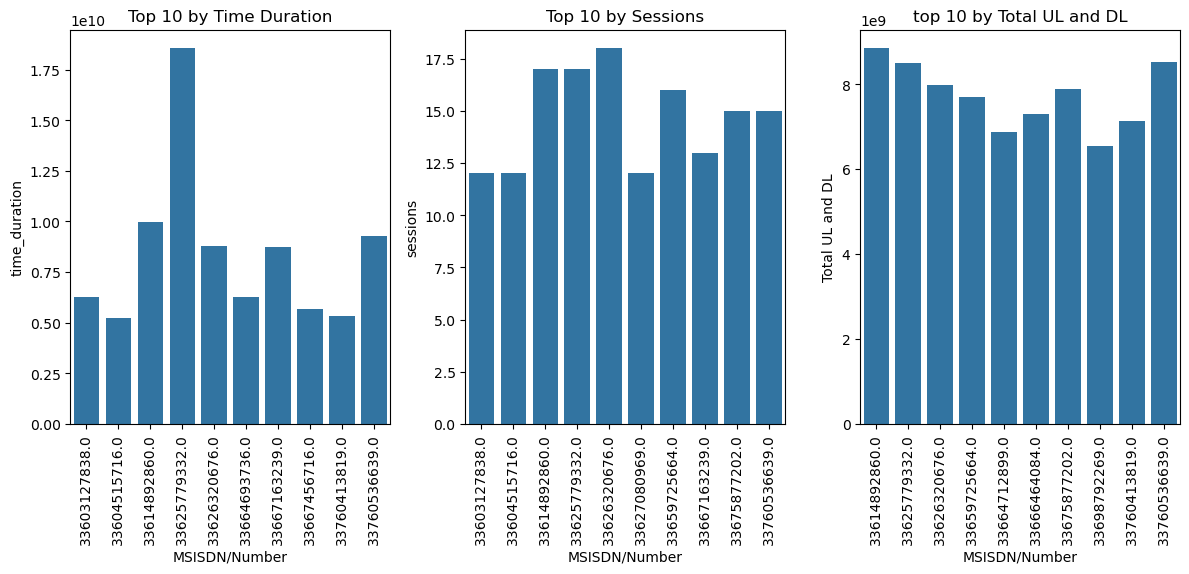

In [24]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
sns.barplot(data=users.nlargest(10,'time_duration'),x='MSISDN/Number',y='time_duration',ax=ax[0])
sns.barplot(data=users.nlargest(10,'sessions'),x='MSISDN/Number',y='sessions',ax=ax[1])
sns.barplot(data=users.nlargest(10,'Total UL and DL'),x='MSISDN/Number',y='Total UL and DL',ax=ax[2])
ax[0].set_title("Top 10 by Time Duration")
ax[1].set_title("Top 10 by Sessions")
ax[2].set_title("top 10 by Total UL and DL")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

<Axes: >

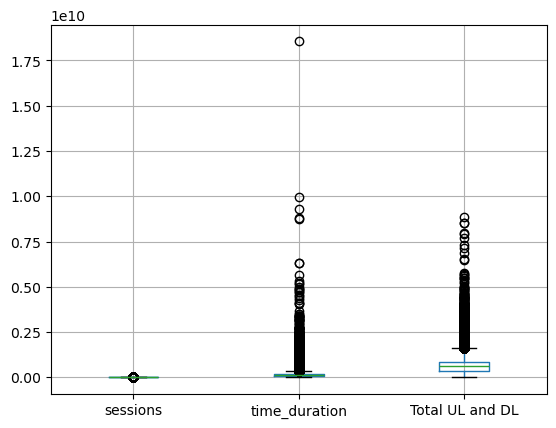

In [25]:
users.boxplot()

In [26]:
pd.set_option("display.float_format","{:.2f}".format)

In [27]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(users)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.49,-0.16,0.39
1,-0.49,0.19,-1.09
2,-0.49,-0.06,-0.19
3,-0.49,-0.52,-0.55
4,0.77,-0.59,1.58


In [28]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.76,-0.25,0.60
1,-0.40,0.16,-0.90
2,-0.93,-0.12,-0.36
3,-0.54,-0.58,-0.61
4,0.41,-0.32,0.85


In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [30]:
users.insert(0,'Cluster',kmeans.labels_)
users.head(5)

,Cluster,sessions,time_duration,Total UL and DL
MSISDN/Number,,,,
33601001722.00,2,1,116720140.00,878690574.00
33601001754.00,0,1,181230963.00,156859643.00
33601002511.00,0,1,134969374.00,595966483.00
33601007832.00,0,1,49878024.00,422320698.00
33601008617.00,1,2,37104453.00,1457410944.00


In [31]:
users['Cluster'].value_counts()

Cluster
0    47500
2    29331
1    28888
Name: count, dtype: int64

<Axes: xlabel='Total UL and DL', ylabel='time_duration'>

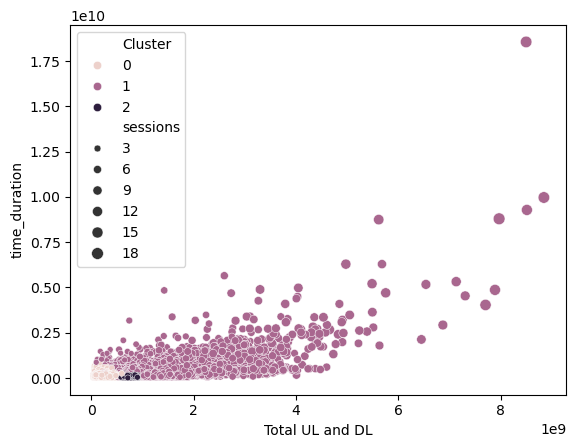

In [32]:
sns.scatterplot(users, x='Total UL and DL', y="time_duration", hue='Cluster', size='sessions')


### Inference:
##### 1) Cluster 1 customers are relatively higher in amount and have a very diverse Data Volume and time duration.
##### 2) Cluster 0 customers have the lowest Data Volume and lowest time duration.
##### 3) Cluster 2 customers have higher data volumae than cluster 0 customers



### * Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [33]:
cluster1 = users[users["Cluster"]==0]
cluster1.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,47500.00,47500.00,47500.00,47500.00
mean,0.00,1.00,106502830.95,334957623.08
std,0.00,0.07,69737740.54,152632640.04
min,0.00,1.00,7189000.00,33249009.00
25%,0.00,1.00,59952116.25,204264945.00
50%,0.00,1.00,87492547.00,333061411.00
75%,0.00,1.00,142674954.00,465233452.00
max,0.00,2.00,780471478.00,697705378.00


In [34]:
cluster2 = users[users["Cluster"]==1]
cluster2.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,28888.00,28888.00,28888.00,28888.00
mean,1.00,2.42,264972323.12,1203979287.30
std,0.00,0.93,306290116.55,586920416.14
min,1.00,1.00,18235797.00,97053379.00
25%,1.00,2.00,131064164.75,819708834.00
50%,1.00,2.00,202603768.00,1105594324.50
75%,1.00,3.00,325927680.00,1457487476.25
max,1.00,18.00,18553763486.00,8846226494.00


In [35]:
cluster3 = users[users["Cluster"]==2]
cluster3.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,29331.00,29331.00,29331.00,29331.00
mean,2.00,1.00,93552812.99,754668786.89
std,0.00,0.00,57071810.71,96584139.67
min,2.00,1.00,7142988.00,545524904.00
25%,2.00,1.00,46345035.50,673960052.50
50%,2.00,1.00,86399965.00,756136792.00
75%,2.00,1.00,128251276.50,837037231.50
max,2.00,1.00,340560164.00,950760661.00


###  * Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [36]:
apps_df = df.groupby('MSISDN/Number').agg({'Gaming_Total_Data': 'sum', 'Youtube_Total_Data': 'sum', 'Netflix_Total_Data': 'sum',
                     'Google_Total_Data': 'sum', 'Email_Total_Data': 'sum', 'Social_Media_Total_Data': 'sum', 'Other_Total_Data': 'sum'})
apps_df.head(10)

,Gaming_Total_Data,Youtube_Total_Data,Netflix_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Other_Total_Data
MSISDN/Number,,,,,,,
33601001722.00,812458661.00,21624548.00,27180981.00,4389005.00,1331362.00,2232135.00,386570872.00
33601001754.00,119750078.00,12432223.00,11221763.00,5334863.00,3307781.00,2660565.00,281710071.00
33601002511.00,538827713.00,21333570.00,19353900.00,3443126.00,3205380.00,3195623.00,501693672.00
33601007832.00,391126127.00,6977321.00,1942092.00,9678493.00,2284670.00,280294.00,35279702.00
33601008617.00,1314797820.00,41533002.00,49201724.00,18499616.00,3305469.00,2912542.00,804804484.00
33601010682.00,511635787.00,34347122.00,30315501.00,15263134.00,7848596.00,3792912.00,492372777.00
33601011634.00,548461057.00,26431335.00,45812397.00,10196403.00,1358959.00,2769627.00,224888713.00
33601011959.00,282364397.00,18892740.00,15292840.00,12023614.00,2215563.00,1782692.00,178201537.00
33601014694.00,833087952.00,63443802.00,54216117.00,14134211.00,4599825.00,5288685.00,1041882992.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       146891 non-null  float64
 1   Start                           146891 non-null  object 
 2   Start ms                        146891 non-null  float64
 3   End                             146891 non-null  object 
 4   End ms                          146891 non-null  float64
 5   Dur. (ms)                       146891 non-null  float64
 6   IMSI                            146891 non-null  float64
 7   MSISDN/Number                   146891 non-null  float64
 8   IMEI                            146891 non-null  float64
 9   Last Location Name              146891 non-null  object 
 10  Avg RTT DL (ms)                 146891 non-null  float64
 11  Avg RTT UL (ms)                 146891 non-null  float64
 12  Avg Bearer TP DL

### * Plot the top 3 most used applications using appropriate charts.

In [38]:
top_3 = apps_df.sum()
top_3

Gaming_Total_Data         63215294882199.00
Youtube_Total_Data         3325904550858.00
Netflix_Total_Data         3324049323727.00
Google_Total_Data          1146921653914.00
Email_Total_Data            331838236748.00
Social_Media_Total_Data     268478589410.00
Other_Total_Data          63055410744638.00
dtype: float64

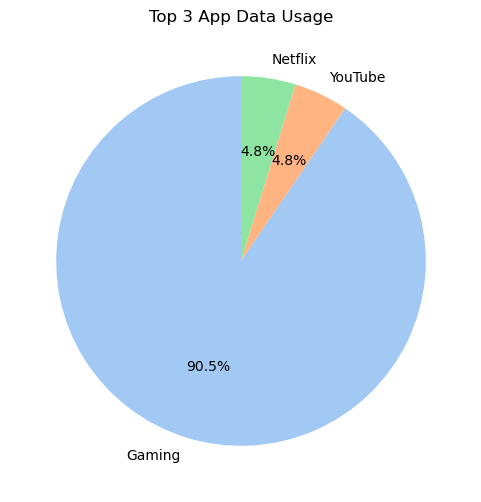

In [39]:
sizes = [63215294882199, 3325904550858, 3324049323727]   # replace with top_3 values
labels = ['Gaming', 'YouTube', 'Netflix']  # replace with categories
colors = sns.color_palette("pastel")[0:len(sizes)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Top 3 App Data Usage")
plt.show()

### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:
### ○ What is the optimized value of k (use the elbow method for this)?
### ○ Interpret your findings.

In [43]:
#  Building the Clustering Model and Calculating Distortion and Inertia
X= data_normalized
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 12)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 0.8857639223539038
2 : 0.39692758310553067
3 : 0.2459290609773741
4 : 0.2103755909493583
5 : 0.16255558203944898
6 : 0.13662619996023959
7 : 0.1185981824560747
8 : 0.09933562100409557
9 : 0.08828824157828546
10 : 0.08119283555002908
11 : 0.07508889277006826


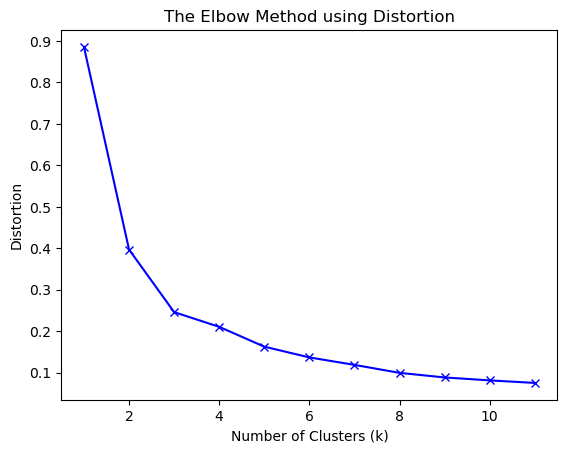

In [44]:
# Displaying Distortion Values

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 93642.07610733114
2 : 41962.78715833282
3 : 25999.37439746731
4 : 22240.697099575314
5 : 17185.213577628525
6 : 14443.98523359657
7 : 12538.081251073716
8 : 10501.662516932218
9 : 9333.744611414819
10 : 8583.625381513379
11 : 7938.322654758876


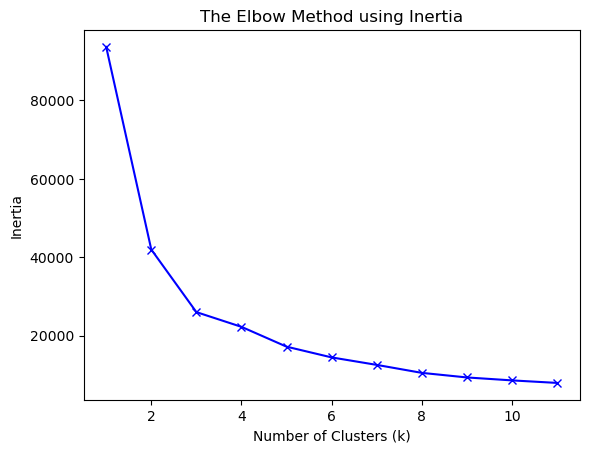

In [45]:
# Displaying Distortion Values

print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

##### from the above 2 plots it can be seen that 4 cluster  is the optimal number of clusters

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
users["cluster"]= kmeans.labels_
users

,Cluster,sessions,time_duration,Total UL and DL,cluster
MSISDN/Number,,,,,
33601001722.00,2,1,116720140.00,878690574.00,3
33601001754.00,0,1,181230963.00,156859643.00,0
33601002511.00,0,1,134969374.00,595966483.00,0
33601007832.00,0,1,49878024.00,422320698.00,0
33601008617.00,1,2,37104453.00,1457410944.00,1
...,...,...,...,...,...
33789967113.00,0,1,160461578.00,208123067.00,0
33789980299.00,1,2,210390146.00,1094693386.00,1
33789996170.00,2,1,8810688.00,714641641.00,3


### Save user Engeagments Dataset

In [47]:
users.to_csv('D:\\Digicrome classes\\NextHIkes\\Project 5\\user_engagement.csv')

#### Saving Model with pickle

In [50]:
import pickle

In [51]:
with open("D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\users.pkl", "wb") as file:
    pickle.dump(kmeans, file)